In [1]:
import os
from pathlib import Path 
from sys import path

In [2]:
# path.append('/home/adb/PycharmProjects/')
path.append('/home/ldang05/Starships_prj/')
# path.append('/home/adb/PycharmProjects/starships_analysis/')

In [3]:
import matplotlib.pyplot as plt
from importlib import reload

import starships.homemade as hm
# from starships import analysis as a
from starships import spectrum as spectrum
# from starships.transpec import build_trans_spectrum4

# import starships.extract as ext #read_all_sp, rm_star_median
import starships.orbite as o
from starships.mask_tools import interp1d_masked
interp1d_masked.iprint=False
# import starships.utils.mask_tools as mt
import starships.correlation as corr
from starships.analysis import bands, ord_frac_tresh
import starships.ttest_fcts as nf
import starships.plotting_fcts as pf 

import numpy as np
from scipy.interpolate import interp1d, interp2d
# import scipy as sp
# from scipy.optimize import fminbound
# from scipy.ndimage.filters import generic_filter1d
# from scipy.optimize import curve_fit
# from scipy.ndimage import convolve1d

import astropy.units as u
from astropy.time import Time
from astropy.io import fits
import astropy.constants as const
from astropy.table import Table
# from astropy.stats import sigma_clip
# from astropy.convolution import convolve, Gaussian1DKernel

# from datetime import date, datetime

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from transit_prediction.masterfile import MasterFile as mf_old 
# from masterfile.archive import MasterFile as mf


In [4]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [5]:
# %matplotlib notebook
%matplotlib inline

# - Setting plot parameters - #
plt.rc('figure', figsize=(9, 6))

couleurs = hm.get_colors('magma', 50)[5:-2]

# from cycler import cycler
# plt.rcParams['axes.prop_cycle'] = cycler(color=hm.get_colors('magma', 50))
# ex : list_of_color = [(i,0,0) for i in np.arange(10)/10]

In [6]:
from starships.correlation_class import Correlations
import starships.correlation_class as cc

cc=reload(cc)

from starships.correlation_class import Correlations
import starships.correlation_class as cc

cc=reload(cc)

In [7]:
import starships.planet_obs as pl_obs
from starships.planet_obs import Observations,Planet

pl_obs=reload(pl_obs)

import starships.planet_obs as pl_obs
from starships.planet_obs import Observations,Planet

pl_obs=reload(pl_obs)

# Read spectra and useful quantities

In [8]:
#  pl_name = 'WASP-33 b'
# pl_name = 'WASP-77 A b';
pl_name = 'CoRoT-2 b';

# obs_dir = Path.home() / Path('projects/def-dlafre/adb/Observations/SPIRou/v07275/WASP33/')
# obs_dir = Path('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/')
obs_dir = Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/')
# obs_dir = Path('/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b_230628/')

path_fig = 'Figures/'

In [9]:
from starships.planet_obs import igrins_zoe

In [25]:
# wasp-33
# ap = 0.0259*u.au
# R_star = (ap/3.69).to(u.R_sun)
# R_pl = (0.1143*R_star).to(u.R_jup)
# M_star = 1.561*const.M_sun

# wasp-77 ab
# ap = 0.02335*u.au # semi-major axis
# R_star = 0.91*u.R_sun # star radius
# R_pl = 1.23*u.R_jup # planet radius
# M_star = 0.903*const.M_sun

# corot-2b
ap = 0.0281*u.au # semi-major axis
R_star = 0.902*u.R_sun # star radius
R_pl = 1.465*u.R_jup # planet radius
M_star = 0.97*const.M_sun


obs = Observations(name=pl_name, instrument=igrins_zoe, 
                   pl_kwargs = {'M_star':M_star, 
                                'R_star':R_star,
                                'ap' : ap,
                               'R_pl' : R_pl})

# obs.fetch_data(obs_dir, list_e2ds='list_SDCH_spec.txt', list_tcorr=None, list_recon=None, blaze_path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_telluric_corr.fits') # H band
# obs.fetch_data(obs_dir, list_e2ds='list_SDCK_spec.txt', list_tcorr=None, list_recon='K_list_tellu_recon.txt', blaze_path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/K_telluric_corr.fits') # K band
# obs.fetch_data(obs_dir, list_e2ds='list_SDCHK_spec.txt', list_tcorr=None, list_recon='HK_list_tellu_recon.txt', blaze_path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/HK_tellu_corrected_blaze_func.fits') # both band

# CoRoT-2b
# obs.fetch_data(obs_dir, list_e2ds='list_SDCH_spec.txt', list_tcorr=None, list_recon='H_list_tellu_recon.txt', blaze_path='/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/H_telluric_corr.fits') # H band
# obs.fetch_data(obs_dir, list_e2ds='list_SDCK_spec.txt', list_tcorr=None, list_recon='K_list_tellu_recon.txt', blaze_path='/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/K_telluric_corr.fits') # H band
# obs.fetch_data(obs_dir, list_e2ds='list_SDCHK_spec.txt', list_tcorr=None, list_recon='HK_list_tellu_recon.txt', blaze_path='/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/HK_tellu_corrected_blaze_func.fits') # both band
obs.fetch_data(obs_dir, list_e2ds='list_SDCHK_spec_second_half_test.txt', list_tcorr=None, list_recon='HK_list_tellu_recon_second_half_test.txt', blaze_path='/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/HK_tellu_corrected_blaze_func.fits') # Observing window test

Getting CoRoT-2 b from ExoFile
Changing M_star from [1.92875757e+30] kg to 1.9287575745771094e+30 kg
It became [1.92875757e+30] kg
Changing R_star from [6.2613e+08] m to 0.902 solRad
It became [6.275214e+08] m
Changing ap from [4.18574842e+09] m to 0.0281 AU
It became [4.20370017e+09] m
Changing R_pl from [1.01089688e+08] m to 1.465 jupiterRad
It became [1.0473578e+08] m


In [26]:
# obs.fetch_data??

In [27]:
p = obs.planet

In [28]:
# from PyAstronomy import pyasl

# obs.headers[0]
# ra = obs.headers[0]['OBJRA']
# dec = obs.headers[0]['OBJDEC']
# bjds = [hdr['JD-OBS'] for hdr in obs.headers]

# # Cerro Pachon, Chile
# lat = -70.73669
# lon = -30.24075
# alt = 2722.0
# berv = np.array([pyasl.helcorr(lat, lon, alt, ra, dec, bjd)[0] for bjd in bjds])
# berv


# Build transmission spectrum

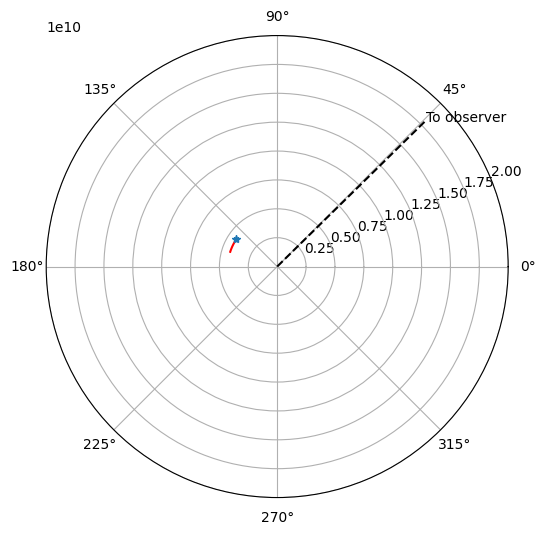

Emission
Masking high variance pixels (quick fix for OH lines). 
flux_norm all nan : False
Shifting everything in the stellar ref. frame and normalizing by the median 
Spectra 
 Unberv : 53 - 24  
Telluriques 
 Unberv : 53 - 24  
flux_Sref all nan : False
Masking deep tellurics. 
flux_masked all nan : False
Building the master out #1 
ratio_filt has values <= 0.75!
flux_norm_mo all nan : False
master_out all nan : False
Building the transmission spectrum #1 
spec-trans all nan : False
Removing the static noise with PCA and sigma cliping 
(25, 54, 2048)
spec_trans all nan : False
clean_ts all nan : False
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 
Calculating noise with 3 PCs
/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/CustomMasking/obs_window_test/second_half/corot2b_HK_3-pc_mask_wings90_data_trs_.npz


/home/ldang05/venv/ss-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


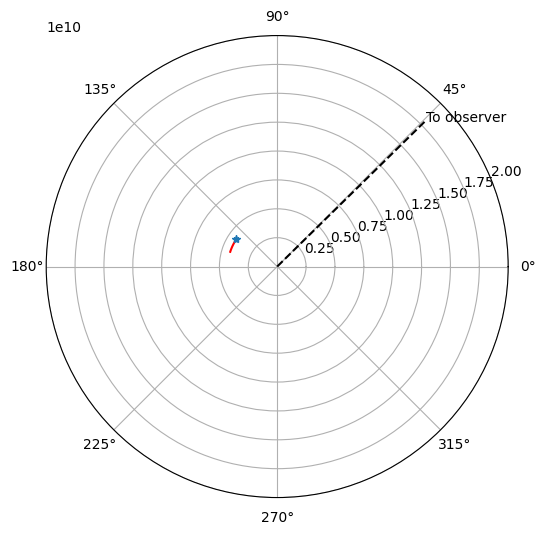

Emission
Masking high variance pixels (quick fix for OH lines). 
flux_norm all nan : False
Shifting everything in the stellar ref. frame and normalizing by the median 
Spectra 
 Unberv : 53 - 24  
Telluriques 
 Unberv : 53 - 24  
flux_Sref all nan : False
Masking deep tellurics. 
flux_masked all nan : False
Building the master out #1 
ratio_filt has values <= 0.75!
flux_norm_mo all nan : False
master_out all nan : False
Building the transmission spectrum #1 
spec-trans all nan : False
Removing the static noise with PCA and sigma cliping 
(25, 54, 2048)
spec_trans all nan : False
clean_ts all nan : False
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 
/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/CustomMasking/obs_window_test/second_half/corot2b_HK_4-pc_mask_wings90_data_trs_.npz


/home/ldang05/venv/ss-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


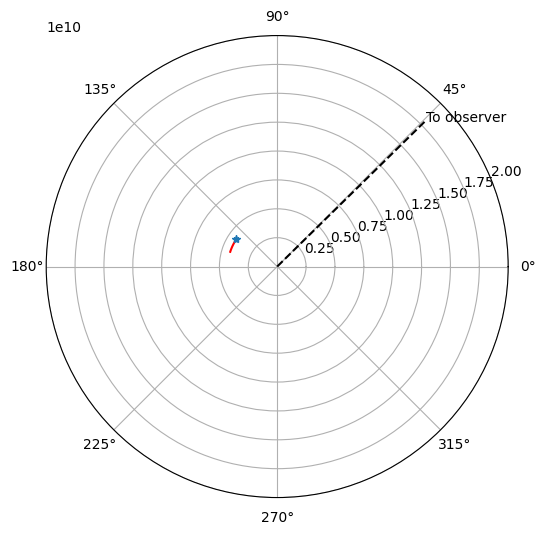

Emission
Masking high variance pixels (quick fix for OH lines). 
flux_norm all nan : False
Shifting everything in the stellar ref. frame and normalizing by the median 
Spectra 
 Unberv : 53 - 24  
Telluriques 
 Unberv : 53 - 24  
flux_Sref all nan : False
Masking deep tellurics. 
flux_masked all nan : False
Building the master out #1 
ratio_filt has values <= 0.75!
flux_norm_mo all nan : False
master_out all nan : False
Building the transmission spectrum #1 
spec-trans all nan : False
Removing the static noise with PCA and sigma cliping 
(25, 54, 2048)
spec_trans all nan : False
clean_ts all nan : False
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 
/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/CustomMasking/obs_window_test/second_half/corot2b_HK_5-pc_mask_wings90_data_trs_.npz


/home/ldang05/venv/ss-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
"""
param_all: Reduction parameters
telluric fraction to mask (usually varied between 0.2 and 0.5), 
limits for the wings (fixed at 0.97), 
width of the smoothing kernel for the low pass filter (fixed at 51), 
useless param, 
width of the gaussian kernel for low pass filter (fixed at 5),
nPC to remove (varied between 1 and 5),
sigma clips params (fixed at 5.0)

(So I basically only change tellu frac and nPC)
"""
# visit_name = 'night1'
mask_wings = 0.9  # Mask wings of deep tellurics

# apero_version = obs.headers[0]['PVERSION'].split('.')
# apero_version = ''.join(apero_version)

n_RV_inj=151
corrRV0 = np.linspace(-150, 150, n_RV_inj)

coeffs = [0.532]
cbp=True  # Correct bad pixels
ld_model = 'linear'
kind_trans='emission'

RVsys = [0.0]
iout_all = ['all']
polynome = [False] 
do_tr=[1]
transit_tags = [None]
kwargs_gen_tr = {
'coeffs' : coeffs,
'ld_model' : ld_model,
'do_tr' : do_tr,
'kind_trans' : kind_trans,
'polynome' : polynome,
'cbp': cbp
}

kwargs_build_ts = {
'clip_ratio' : 6,
'clip_ts' : 6,
'unberv_it' : True,
}

# fig_output_frame = 'Figures/CustomMasking/custom_masking_v{}_WASP-33_{}_{}-pc_mask_wings{:n}.png'
# fig_output_frame = 'Figures/CustomMasking/custom_masking_WASP-33_{}-pc_mask_wings{:n}.png'
for n_pc in [3, 4, 5]:
# for n_pc in [4]:
    # params_all=[[0.20, mask_wings, 51, 41, 5, n_pc, 5.0, 5.0, 5.0, 5.0]]
    params_all=[[0.40, mask_wings, 51, 41, 5, n_pc, 5.0, 5.0, 5.0, 5.0]]
    list_tr = pl_obs.generate_all_transits(obs, transit_tags, RVsys, params_all, iout_all,
                                           **kwargs_gen_tr, **kwargs_build_ts)

    # fig_output_file = fig_output_frame.format(apero_version, visit_name, n_pc, mask_wings*100)
    # pl_obs.mask_tellu_sky(list_tr['1'], corrRV0, plot_clean=True, pad_to=mask_wings, fig_output_file=fig_output_file)

    # out_filename = f'v{apero_version}_wasp33_{n_pc}-pc_mask_wings{mask_wings*100:n}'
    # pl_obs.save_single_sequences(out_filename, list_tr['1'], path='Reductions', filename_end=visit_name)
    
    # fig_output_file = fig_output_frame.format(n_pc, mask_wings*100)
    # pl_obs.mask_tellu_sky(list_tr['1'], corrRV0, plot_clean=True, pad_to=mask_wings, fig_output_file=fig_output_file)

    # out_filename = f'wasp77_{n_pc}-pc_mask_wings{mask_wings*100:n}' # H band
    # out_filename = f'wasp77_HK_{n_pc}-pc_mask_wings{mask_wings*100:n}' # combined H and K band

    # WASP 77
    # out_filename = f'wasp77_K_{n_pc}-pc_mask_wings{mask_wings*100:n}' # K band
    # pl_obs.save_single_sequences(out_filename, list_tr['1'], path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/CustomMasking/')
    
    # COROT 2b
    out_filename = f'corot2b_HK_{n_pc}-pc_mask_wings{mask_wings*100:n}' # K band
    # pl_obs.save_single_sequences(out_filename, list_tr['1'], path='/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b_230628/CustomMasking/')
    pl_obs.save_single_sequences(out_filename, list_tr['1'], path='/home/ldang05/projects/def-dlafre/ldang05/Data/CoRoT-2b/CustomMasking/obs_window_test/second_half/')

In [30]:
np.ma.median(obs.count,axis=-1)

masked_array(
  data=[[85.30377960205078, 544.2996826171875, 983.1176147460938, ...,
         39.655059814453125, 3.0786235332489014, -1.6674299240112305],
        [84.3062744140625, 549.3201904296875, 988.6328735351562, ...,
         32.97157669067383, 9.837058067321777, 12.276479721069336],
        [88.56784057617188, 576.8233032226562, 1038.92724609375, ...,
         32.53278350830078, 0.858726441860199, -0.3320351243019104],
        ...,
        [166.51609802246094, 658.7740478515625, 1104.322265625, ...,
         38.74089050292969, 6.384443759918213, 1.3514587879180908],
        [163.63330078125, 678.6258544921875, 1107.1571044921875, ...,
         42.737266540527344, -1.8356176614761353, -16.222394943237305],
        [155.56991577148438, 684.6077880859375, 1143.20166015625, ...,
         50.7257194519043, 18.152812957763672, 21.244651794433594]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False

In [31]:
# # # --- Pour enregistrer des données en format retrievals ---
# # data_file_name = 'kelt20_oct2022'
# # pl_obs.save_sequences(data_path+planet_path+data_version, data_file_name, list_tr, do_tr)

# # #########

# # --- Pour enregistrer des données en format tests et cartes de CCF/logL ---
# out_filename = f'{version_dir}_wasp33_{n_pc}-pc_mask_wings{mask_wings*100:n}'
# pl_obs.save_single_sequences(out_filename, list_tr['1'], path='Reductions', filename_end='night1')

In [32]:
from starships.analysis import bands
bands(list_tr['1'].wv, 'h')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 53])

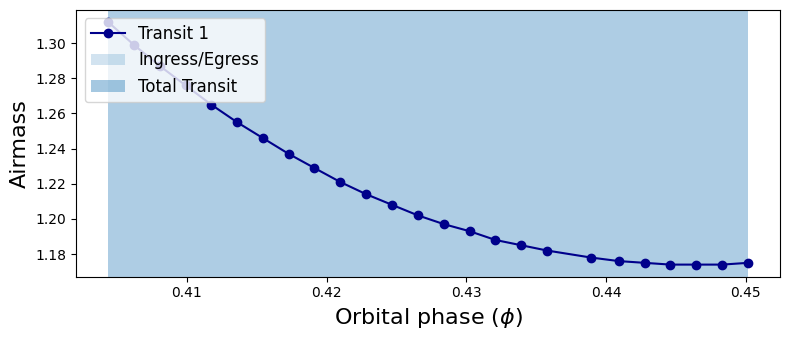

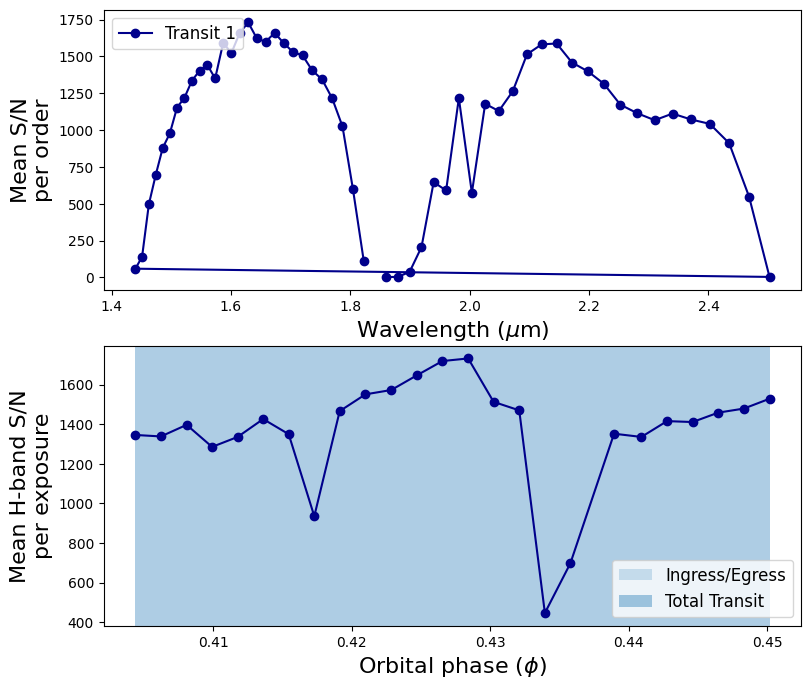

In [33]:
# pl_obs.load_single_sequences('Reductions/obj_fullv07254_wasp33_2-pc_mask_wings97_data_trs_night2.npz',
#                              name=pl_name, planet=p)

# pl_obs.load_single_sequences('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/CustomMasking/wasp77_HK_4-pc_mask_wings90_data_trs_.npz',
#                              name=pl_name, planet=p)

pf.plot_airmass([list_tr['1']])
# plt.plot(list_tr['1'].phase, np.ones_like(list_tr['1'].phase),'.')


In [34]:
list_tr['1'].phase

array([0.4043805 , 0.40622044, 0.40807701, 0.40991637, 0.41175974,
       0.41360484, 0.4154465 , 0.41729561, 0.41913096, 0.42098753,
       0.42285558, 0.42469551, 0.42654462, 0.42840751, 0.430244  ,
       0.43209483, 0.43394624, 0.43578847, 0.43894109, 0.4409147 ,
       0.44276668, 0.44461408, 0.44646376, 0.44831976, 0.45016715])

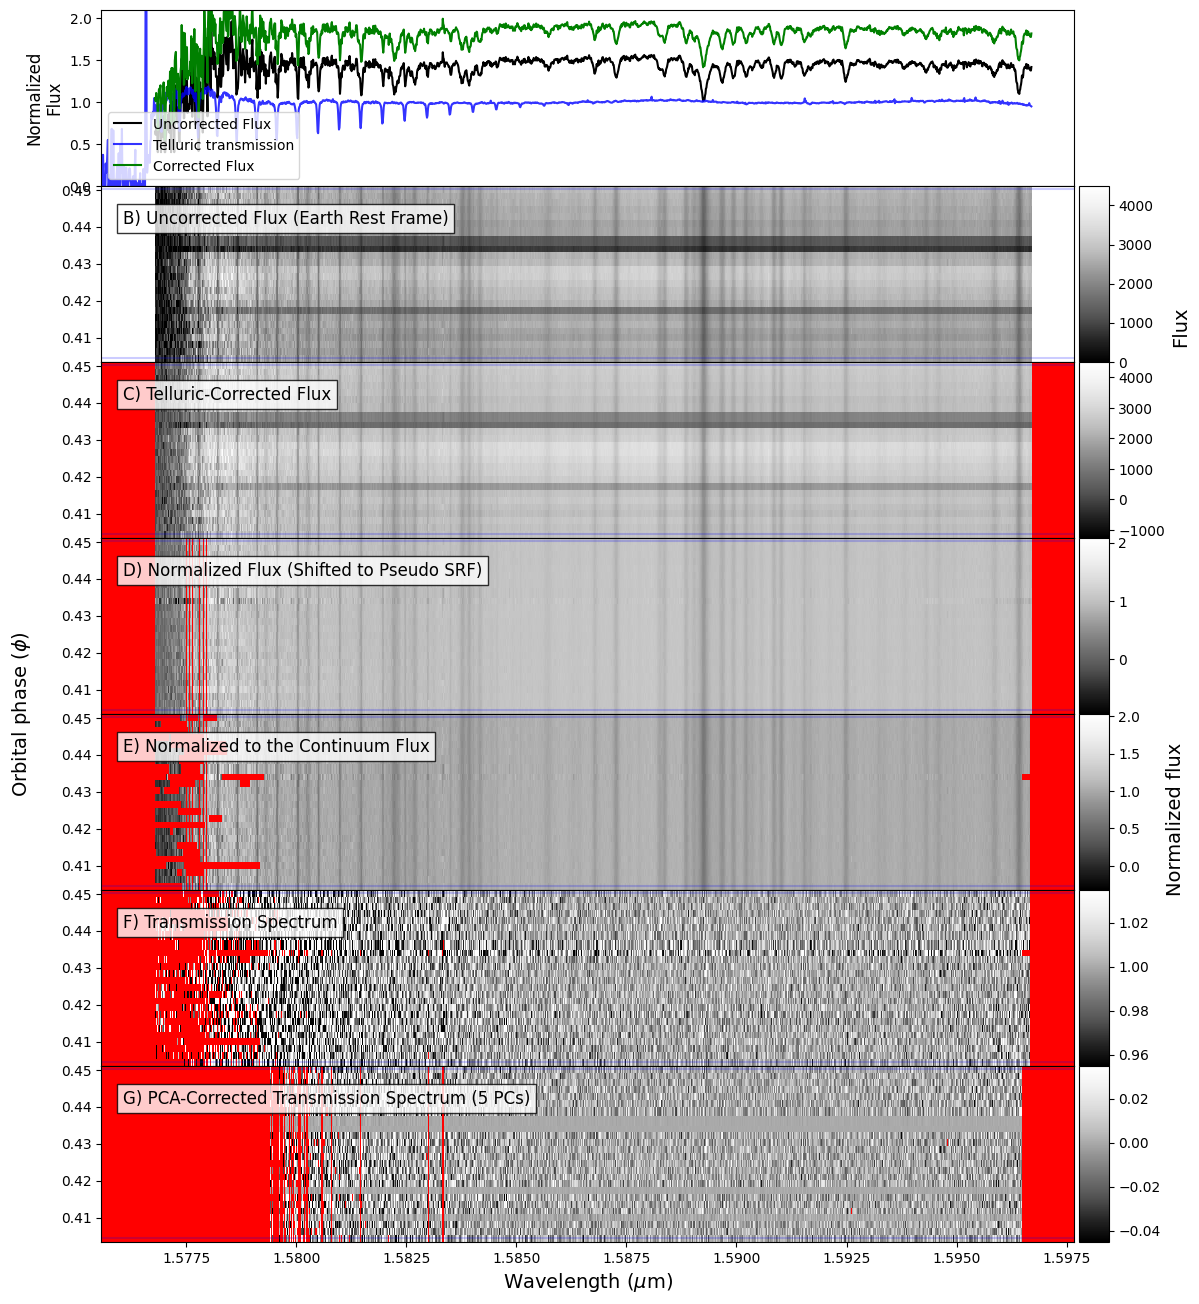

In [35]:
# Check the phase
pf.plot_steps(list_tr['1'], 15)

In [19]:
p.R_star.to(u.R_sun)

<Quantity [1.44] solRad>

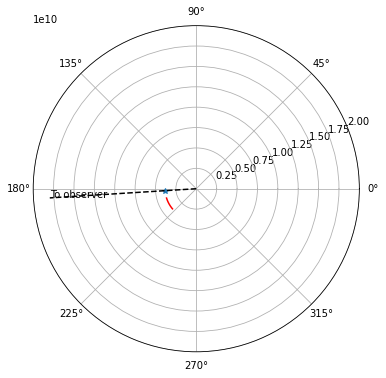

out:  [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37] , part:  [] , total: []
Emission
flux_norm all nan : False
Shifting everything in the stellar ref. frame and normalizing by the median 
Spectra 
 Unberv : 48 - 37  
Telluriques 
 Unberv : 48 - 37  
flux_Sref all nan : False
Masking deep tellurics. 
flux_masked all nan : False
Building the master out #1 
ratio_filt has values <= 0.75!
flux_norm_mo all nan : False
master_out all nan : False
Building the transmission spectrum #1 
spec-trans all nan : False
Removing the static noise with PCA and sigma cliping 
(38, 49, 4088)
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 
Calculating noise with 2 PCs


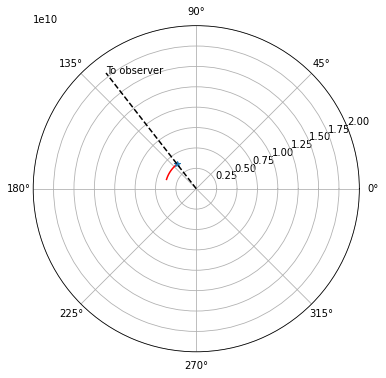

out:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35] , part:  [] , total: []
Emission
flux_norm all nan : False
Shifting everything in the stellar ref. frame and normalizing by the median 
Spectra 
 Unberv : 48 - 37  
Telluriques 
 Unberv : 48 - 37  
flux_Sref all nan : False
Masking deep tellurics. 
flux_masked all nan : False
Building the master out #1 
ratio_filt has values <= 0.75!
flux_norm_mo all nan : False
master_out all nan : False
Building the transmission spectrum #1 
spec-trans all nan : False
Removing the static noise with PCA and sigma cliping 
(38, 49, 4088)
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 
Calculating noise with 2 PCs


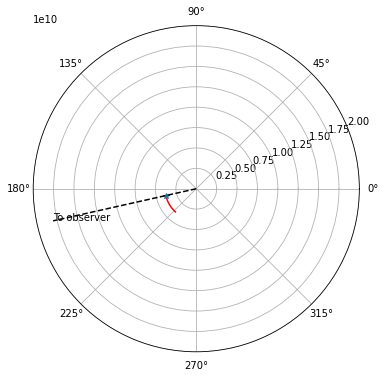

out:  [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130] , part:  [] , total: []
Emission
flux_norm all nan : False
Shifting everything in the stellar ref. frame and normalizing by the median 
Spectra 
 Unberv : 48 - 130  
Telluriques 
 Unberv : 48 - 130  
flux_Sref all nan : False
Masking deep tellurics. 
flux_masked all nan : False
Building the master out #1 
ratio_filt has values <= 0.75!
flux_norm_mo all nan : False
master_out all nan : False
Building the transmission spectrum #1 
spec-trans all nan : False
Removing the static noise with PCA and sigma cliping 
(131, 49, 40

In [20]:
RVsys = [0 for _ in transit_tags] 

# Default reduction parameters
default_param = [0.20, 0.97, 51, 41, 5, 2, 5.0, 5.0, 5.0, 5.0] 

params_all = [default_param for _ in transit_tags] 

list_tr = generate_all_transits(obs, transit_tags, RVsys, params_all,
                                coeffs=[0.532], ld_model='linear', 
                                clip_ratio=5, clip_ts=5, do_tr=[1, 2, 3], kind_trans='emission')

In [21]:
# t1,t2,t12 = list_tr


In [36]:
list_tr[2].iin_e, list_tr[2].iout_e, list_tr[2].iIn, list_tr[2].iOut, list_tr[2].part

(array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
         33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,

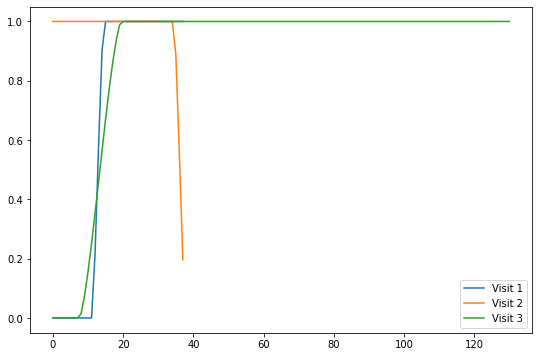

In [32]:
for idx, tr_i in enumerate(list_tr):
    plt.plot(tr_i.alpha_frac, label=f'Visit {idx+1}')
plt.legend()

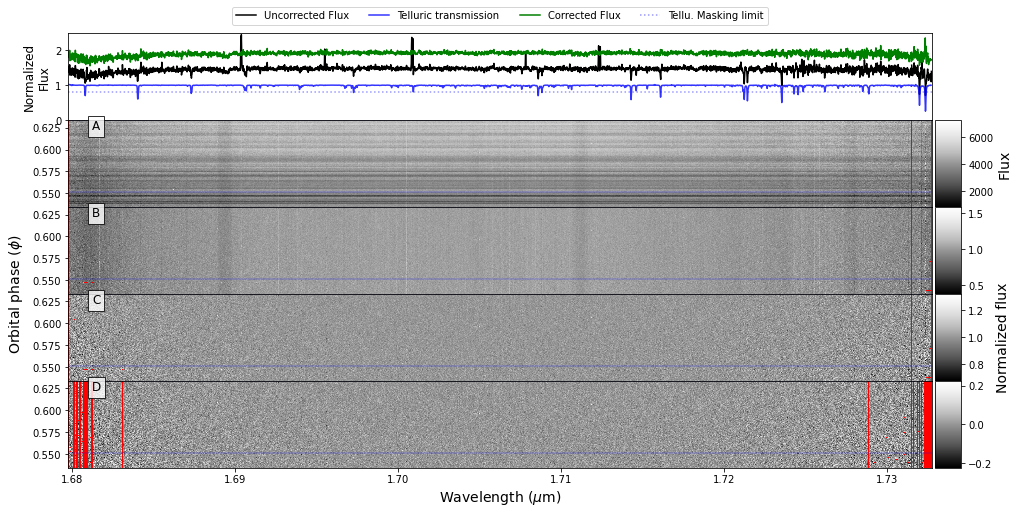

In [50]:
fig = pf.plot_five_steps(list_tr[0],34)

In [36]:
type(list_tr['1'].path)

str

<IPython.core.display.Javascript object>


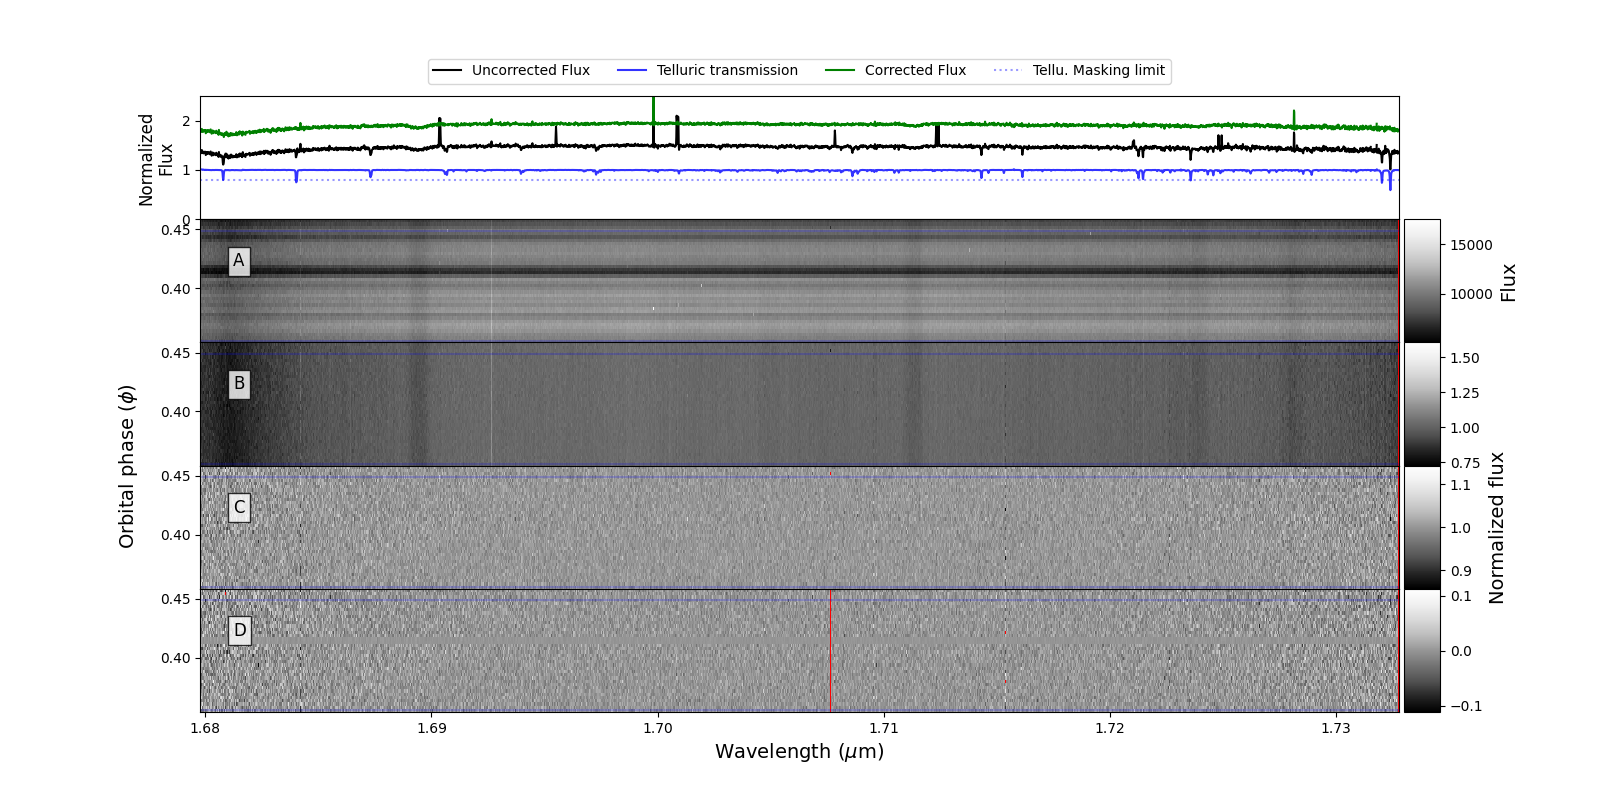

In [38]:
fig = pf.plot_five_steps(t2,34)

<IPython.core.display.Javascript object>


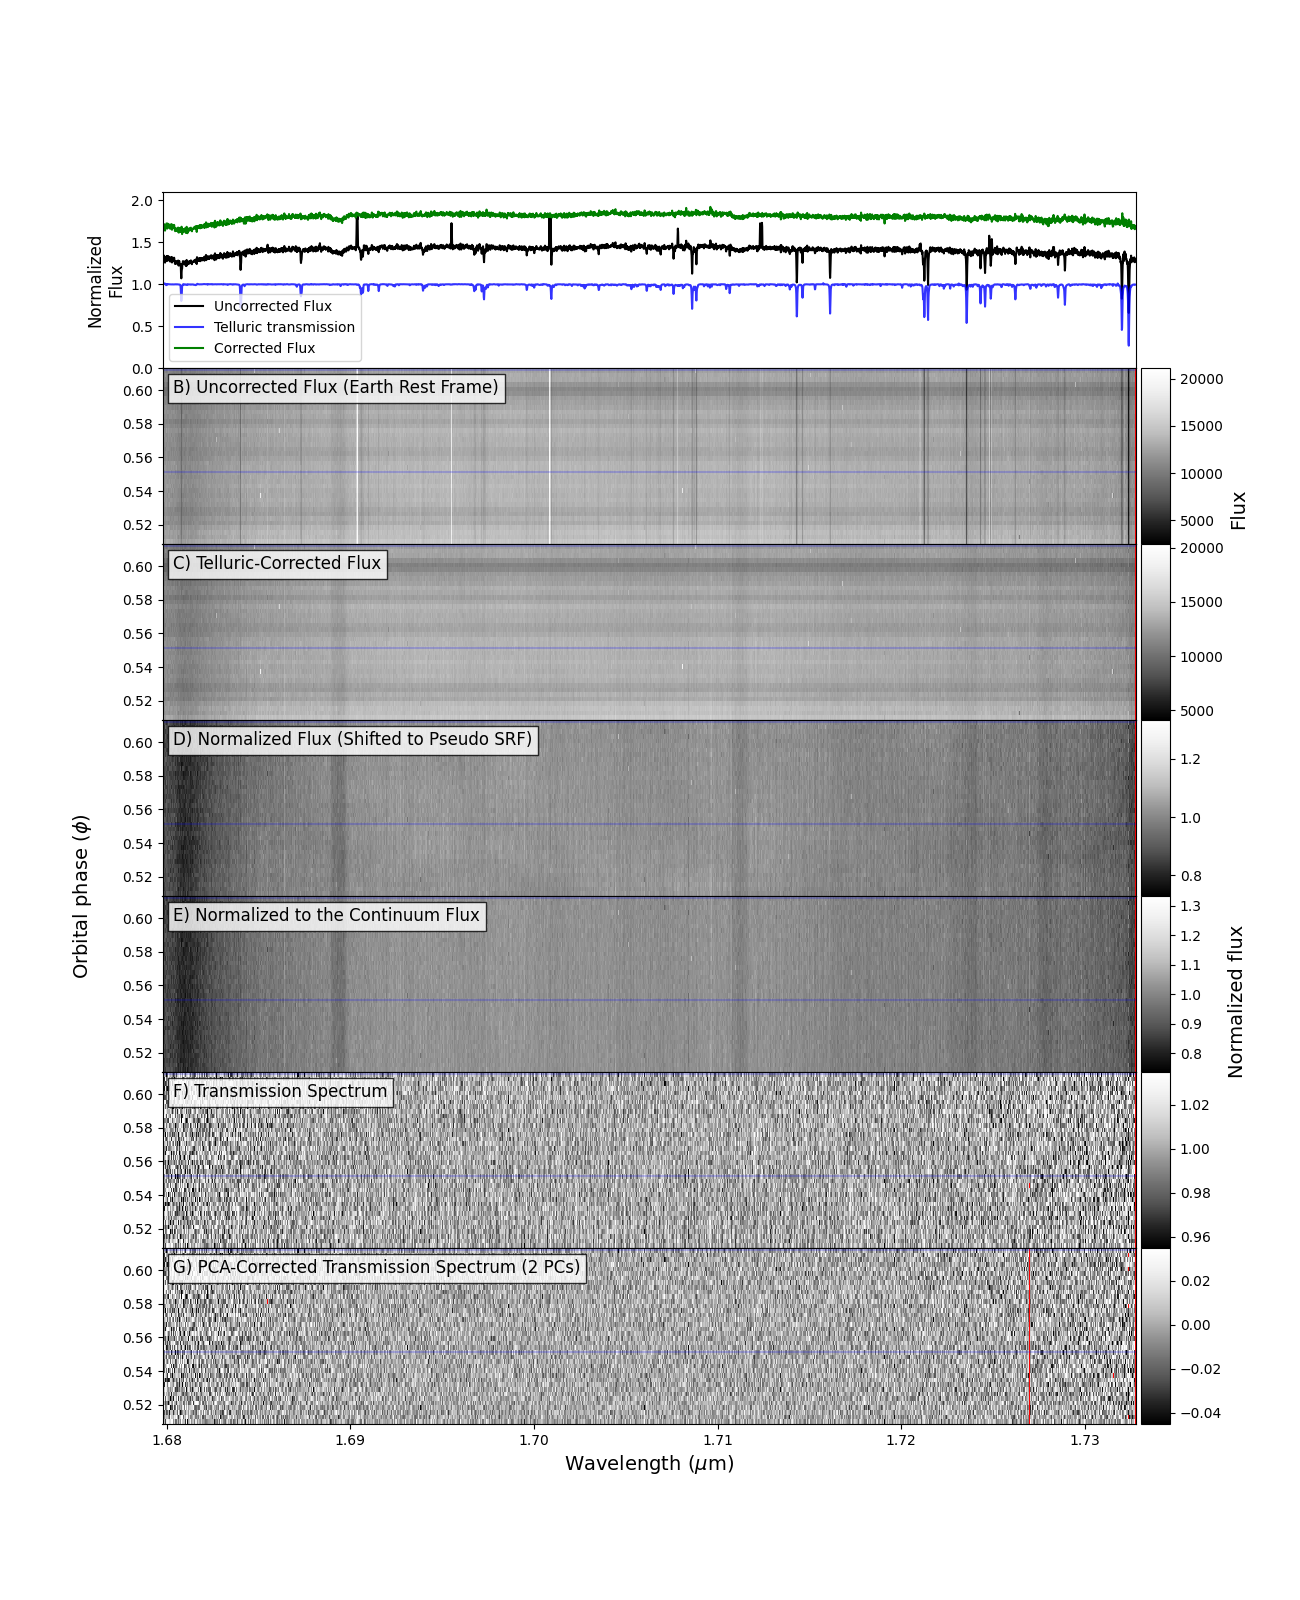

In [39]:
fig = pf.plot_steps(t1,34)